# Working with Images


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


In [ ]:
np.seterr(divide='ignore', invalid='ignore')

In [2]:
# Navigate to directory and read list of image files
glob.os.chdir('/Users/andrespatrignani//Dropbox/Teaching/Scientific programming/introcoding-spring-2019/Datasets/')

img_files = glob.glob('*.jpg')


wheat_example.jpg


In [13]:
#Read image
original_img = mpimg.imread(img_files[0])
#rgb = plt.imread(img_files[0])


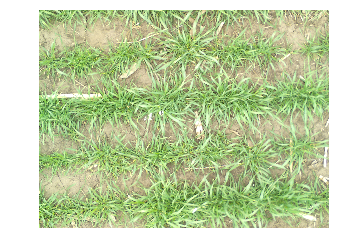

In [14]:
plt.imshow(original_img)
plt.axis('off')
plt.show()

In [15]:
original_img.shape

(2448, 3264, 3)

In [16]:
original_img.dtype

dtype('uint8')

In [23]:
#Convert data to single precision floating (m x n x 3 array) (you can convert it to double if you want, but each value has only 3 digits).
rgb = np.single(original_img)
#original_single = np.double(original_img)

print(rgb.dtype)


float32


In [25]:
#Extract data in separate variable for easier manipulation.
red = rgb[:, :, 0] #Extract matrix of red pixel values into a separate array (so it is easier to manipulate them from now on, m x n array)
green = rgb[:, :, 1] #Extract matrix of green pixel values into a separate array (m x n).
blue = rgb[:, :, 2] #Extract matrix of blue pixel values into a separate array (m x n).


In [26]:
print(red.shape) # Compare shape with original image

(2448, 3264)


In [ ]:
red_green = np.divide(red, green) #Calculate red to green ratio for each pixel. The result is an m x n array.
blue_green = np.divide(blue, green) #Calculate blue to green ratio for each pixel. The result is an m x n array.
classified_img = np.logical_and(red_green < 0.95, blue_green < 0.95, green > 10) #Classification of green pixels
#See that we started with an m x n x 3 (original image) and we finished with and m x n x 2 (binary or classified image)


In [18]:
# Compute canopy cover
percent_cc = np.float(np.sum(classified_img)) / np.float(np.size(classified_img)) * 100 #Calculate percent canopy cover

print('Green canopy cover:',round(percent_cc,2),' %')

Green canopy cover: 64.91  %


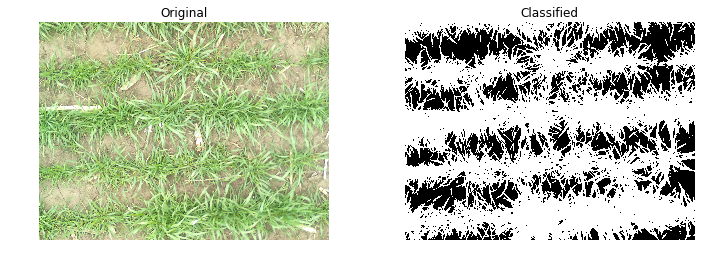

In [22]:
#Create subplots containing the original and binary images


fig = plt.figure(figsize=(12,4))
fig.tight_layout()
left_img = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(original_img)
left_img.set_title('Original')
left_img.axis('off')

right_img = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(classified_img, cmap='gray') # or 'Green'
right_img.set_title('Classified')
right_img.axis('off')
plt.show()